In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('./datasets/winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [4]:
## First we splitting Train and Test data

In [5]:
X = df.drop('quality',axis=1)
Y = df['quality']

In [12]:
Y.isnull().sum()


0

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3,random_state=0)

In [13]:
mutual_info = mutual_info_classif(X_train,Y_train)
mutual_info

array([0.04349572, 0.11702514, 0.10086505, 0.00683468, 0.03660929,
       0.0151131 , 0.06781333, 0.09001059, 0.02170275, 0.0948661 ,
       0.19879906])

In [16]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

alcohol                 0.198799
volatile acidity        0.117025
citric acid             0.100865
sulphates               0.094866
density                 0.090011
total sulfur dioxide    0.067813
fixed acidity           0.043496
chlorides               0.036609
pH                      0.021703
free sulfur dioxide     0.015113
residual sugar          0.006835
dtype: float64

<AxesSubplot:>

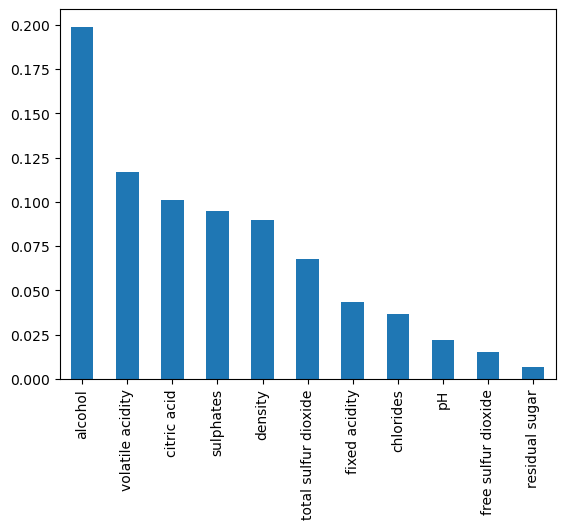

In [20]:
mutual_info.sort_values(ascending=False).plot.bar()

In [21]:
## Now we are findig top 5 mutual information gain
from sklearn.feature_selection import SelectKBest

In [25]:
select_5_best = SelectKBest(mutual_info_classif,k=5)
select_5_best.fit(X_train,Y_train)
X_train.columns[select_5_best.get_support()]

Index(['volatile acidity', 'total sulfur dioxide', 'density', 'sulphates',
       'alcohol'],
      dtype='object')